In [1]:
import numpy as np

from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True)

In [3]:
kint = np.logspace(-3,1,2000)
pint = np.interp(kint, klin, plin)

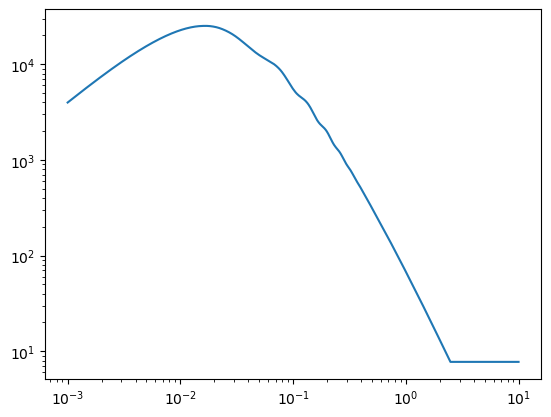

In [4]:
plt.loglog(kint, pint)

In [5]:
from scipy.special import gamma

gamma(1.5-300j)

(8.784068582586016e-203+1.406972430433173e-202j)

In [6]:
from spherical_bessel_transform import SphericalBesselTransform as SBT

In [7]:
sph = SBT(kint,fourier=True)

/Users/sfschen/Work/ZeNBu_JAX/spherical_bessel_transform.py:123: RuntimeWarning: invalid value encountered in scalar divide
  func =  gamma(0.5*(nu+z)) / gamma(0.5*(3+nu-z))
/Users/sfschen/Work/ZeNBu_JAX/spherical_bessel_transform.py:123: RuntimeWarning: overflow encountered in divide
  func =  gamma(0.5*(nu+z)) / gamma(0.5*(3+nu-z))
/Users/sfschen/Work/ZeNBu_JAX/spherical_bessel_transform.py:123: RuntimeWarning: invalid value encountered in divide
  func =  gamma(0.5*(nu+z)) / gamma(0.5*(3+nu-z))


(1.5+681.8471j)
[0]
[1.5+0.0000000e+00j 1.5+3.3293316e-01j 1.5+6.6586632e-01j ...
 1.5+6.8118121e+02j 1.5+6.8151416e+02j 1.5+6.8184711e+02j]
0 [1.5+131.84154j 1.5+132.17447j 1.5+132.5074j  ... 1.5+681.1812j
 1.5+681.51416j 1.5+681.8471j ] [ inf+nanj  nan+infj -inf+nanj ...  nan+nanj  nan+nanj  nan+nanj]


In [8]:
z = 1.5+131.84154j
nu= 15

gamma(0.5*(nu+z)) / gamma(0.5*(3+nu-z))

(-0.6632749286813552-0.7483758206828595j)

In [27]:
rr, xi0 = sph.sph(0,pint * np.exp(-(kint/2)**2))

(0.0, 200.0)

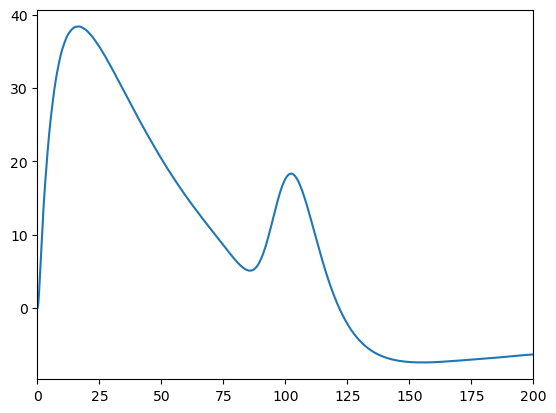

In [28]:
plt.plot(rr, rr**2 * xi0)

plt.xlim(0,200)

In [10]:
def clog(z):
    """
    Compute the complex logarithm of a complex number in JAX.

    Args:
    z (complex): A complex number.

    Returns:
    complex: The complex logarithm of z.
    """
    return jnp.log(jnp.abs(z)) + 1j*jnp.angle(z)


g = 7
lanczos_coeffs  = [
        0.99999999999980993,
        676.5203681218851,
        -1259.1392167224028,
        771.32342877765313,
        -176.61502916214059,
        12.507343278686905,
        -0.13857109526572012,
        9.9843695780195716e-6,
        1.5056327351493116e-7
    ]

def cgamma(z):
    z -= 1
    x = lanczos_coeffs[0]
    for i in range(1, g+2):
        x += lanczos_coeffs[i]/(z+i)
    t = z + g + 0.5
    return jnp.sqrt(2*jnp.pi) * t**(z+0.5) * jnp.exp(-t) * x

def clogamma(z):
    return np.log(cgamma(z))

In [11]:
z = 5.3 + 9.1j
print(np.log(gamma(z)), np.log(cgamma(z)))
print(loggamma(z), clogamma(z))

NameError: name 'jnp' is not defined

In [ ]:
from special import loggamma, gamma

In [ ]:
from jax.scipy.special import gamma

In [ ]:
np.log(0.003591725259702623-0.07634736723406205j)

In [ ]:
np.log(0.0035916949-0.07634735j)

In [ ]:
np.angle(-1 - 1j)

In [ ]:
np.angle(-1+1j)

In [ ]:
from jax.lax import lgamma

In [ ]:
lgamma(-1.2)

In [ ]:
np.where([0,0,1])

(0.0, 0.3)

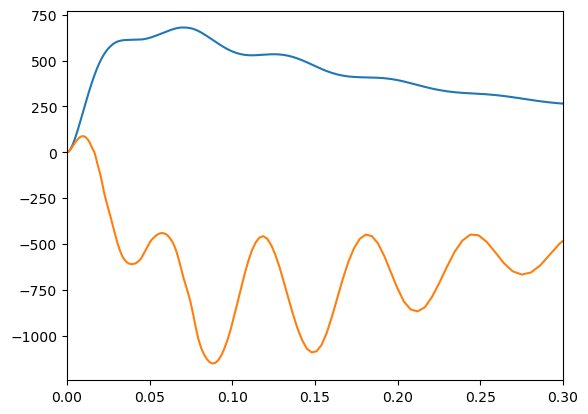

In [20]:
plt.plot(klin, klin*plin)

plt.plot(klin, klin * klin * np.gradient(plin,klin))

plt.xlim(0,0.3)